# Riyadh Restaurants POI Analysis


### what kind of questions that the analysis will answer? 
- corlleation between catgeroies and their locations, for examples gas stations usually have car washs near them, so they geographically colleated , as for the resturants, we have a cafe and bakeies , burgiers and fried chicken , so the target is finding geographical corrlations between categories 

## Dataset overview

## 1. Setup and Libraries


In [43]:
%pip install wordcloud arabic_reshaper python-bidi tqdm contextily



Note: you may need to restart the kernel to use updated packages.


In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Seaborn style for better visualizations
# Allow plots to display inline in the notebook

# --- Load the data ---
# Replace 'riyadh_poi.csv' with the exact name of your uploaded file if it's different.
try:
    df = pd.read_csv('./riyadh_resturants_clean.csv')
    print("Data successfully loaded!")
except FileNotFoundError:
    print("Error: riyadh_poi.csv not found. Please upload the file to the Colab environment.")
    


Data successfully loaded!


In [45]:
# Shape + basic info
print("Shape:", df.shape)
print(df.columns)
print(df.info())



Shape: (19361, 11)
Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19361 non-null  object 
 1   categories     19361 non-null  object 
 2   address        19361 non-null  object 
 3   lat            19361 non-null  float64
 4   lng            19361 non-null  float64
 5   price          17846 non-null  object 
 6   likes          19359 non-null  float64
 7   photos         19361 non-null  int64  
 8   tips           19361 non-null  int64  
 9   rating         7949 non-null   float64
 10  ratingSignals  7949 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB
None


In [46]:
df.describe()

,lat,lng,likes,photos,tips,rating,ratingSignals
count,19361.000000,19361.000000,19359.000000,19361.000000,19361.000000,7949.000000,7949.000000
mean,24.722588,46.697338,63.609639,167.775735,17.090853,7.536231,201.637313
std,0.082220,0.074112,291.028125,985.424550,75.456881,0.942969,552.225144
min,24.469683,46.272777,0.000000,0.000000,0.000000,4.400000,0.000000
25%,24.674721,46.643255,0.000000,1.000000,0.000000,6.900000,14.000000
50%,24.737781,46.693637,3.000000,4.000000,1.000000,7.600000,38.000000
75%,24.784026,46.753452,17.000000,24.000000,5.000000,8.200000,143.000000
max,24.943424,46.940912,9984.000000,26332.000000,2301.000000,9.600000,12376.000000


In [47]:
df.head()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",24.518983,46.656981,Moderate,0.0,0,0,NaN,NaN
1,ديوانية عكاظ,Café,"الرياض 14726, المملكة العربية السعودية",24.518511,46.669149,Cheap,0.0,2,0,NaN,NaN
2,شاهي جمر راعي الجمس,Coffee Shop,"الرياض 14726, المملكة العربية السعودية",24.519314,46.670041,Cheap,0.0,0,0,NaN,NaN
3,غدير الشام,Afghan Restaurant,المملكة العربية السعودية,24.519520,46.671660,Moderate,0.0,0,0,NaN,NaN
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0


## 2. Data Cleaning


In [48]:
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nPercentage of missing values per column:")
print((df.isnull().sum() / len(df)) * 100)
print("\nNumber of unique values per column:")
print(df.nunique())


Missing values per column:
name                 0
categories           0
address              0
lat                  0
lng                  0
price             1515
likes                2
photos               0
tips                 0
rating           11412
ratingSignals    11412
dtype: int64

Percentage of missing values per column:
name              0.000000
categories        0.000000
address           0.000000
lat               0.000000
lng               0.000000
price             7.825009
likes             0.010330
photos            0.000000
tips              0.000000
rating           58.943236
ratingSignals    58.943236
dtype: float64

Number of unique values per column:
name             14520
categories        1130
address           8996
lat              19152
lng              19003
price                4
likes              925
photos            1323
tips               477
rating              50
ratingSignals     1078
dtype: int64


#### cleaning categories column

In [56]:
df['categories'].dropna().str.split(', ').explode().str.strip().unique()

len(df['categories'].value_counts() [df['categories'].value_counts() > 100])
df['categories'].dropna().str.split(', ').explode().value_counts()


categories
Coffee Shop                  2872
Café                         2647
Fast Food Restaurant         1178
Middle Eastern Restaurant    1168
Dessert Shop                 1082
                             ... 
Botanical Garden                1
Clothing Store                  1
Vacation Rental                 1
Law School                      1
Shabu-Shabu Restaurant          1
Name: count, Length: 252, dtype: int64

#### cleaning names

In [50]:
# cleaning names for NLP analysis
# remove any special characters and numbers from the names,
# df['names'] = 

## 3. Geospatial Data Processing


In [51]:
import geopandas as gpd
rest = df.to_crs(epsg=4326)
ax = rest.plot(markersize=2, figsize=(10,10), alpha=0.3)

rest.geometry.plot(ax=ax, alpha=0.5)


AttributeError: 'DataFrame' object has no attribute 'to_crs'

## 4. Visual Exploratory Data Analysis


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.4 MB ? eta -:--:--
   -- ------------------------------------- 1.8/25.4 MB 5.6 MB/s eta 0:00:05
   ----- ---------------------------------- 3.4/25.4 MB 6.5 MB/s eta 0:00:04
   ------- -------------------------------- 5.0/25.4 MB 6.7 MB/s eta 0:00:04
   ---------- ----------------------------- 6.6/25.4 MB 6.9 MB/s eta 0:00:03
   ------------- -------------------------- 8.4/25.4 MB 7.2 MB/s eta 0:00:03
   --------------- ------------------------ 10.0/25.4 MB 7.3 MB/s eta 0:00:03
   ------------------ --------------------- 11.8/25.4 MB 7.5 MB/s eta 0:00:02
   --------------------- ------------------ 13.9/25.4 MB 7.7 MB/s 

In [52]:
len(df['categories'])

19361

In [ ]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lng, df.lat),
    crs="EPSG:4326"
)
gdf.head()
gdf.info()
gdf.crs


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           19361 non-null  object  
 1   categories     13411 non-null  object  
 2   address        19361 non-null  object  
 3   lat            19361 non-null  float64 
 4   lng            19361 non-null  float64 
 5   price          17846 non-null  object  
 6   likes          19359 non-null  float64 
 7   photos         19361 non-null  int64   
 8   tips           19361 non-null  int64   
 9   rating         7949 non-null   float64 
 10  ratingSignals  7949 non-null   float64 
 11  geometry       19361 non-null  geometry
dtypes: float64(5), geometry(1), int64(2), object(4)
memory usage: 1.8+ MB


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

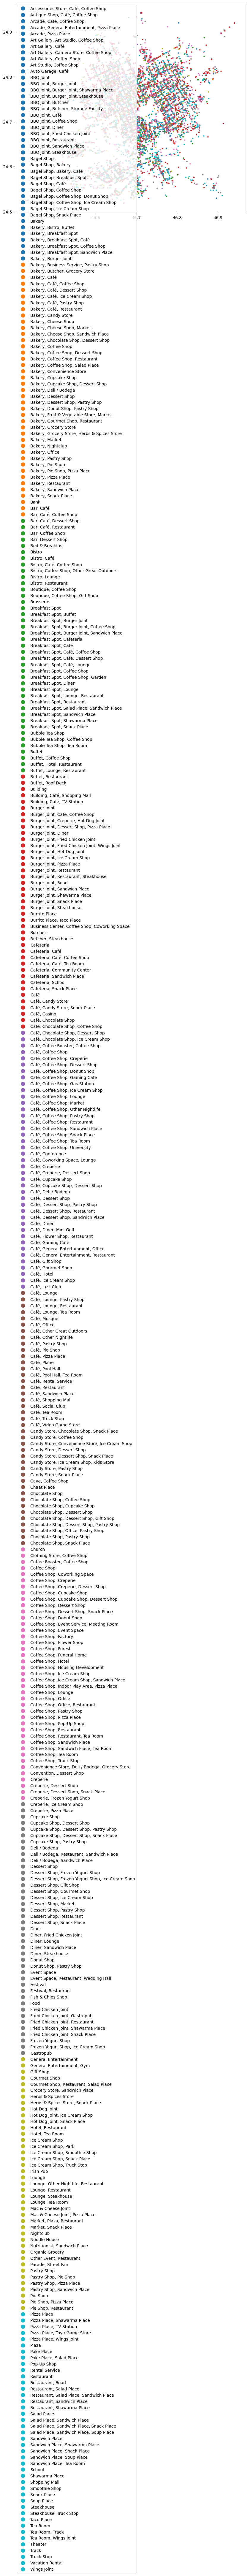

In [ ]:
gdf.plot(
    column="categories",
    figsize=(10,10),
    markersize=5,
    legend=True
)


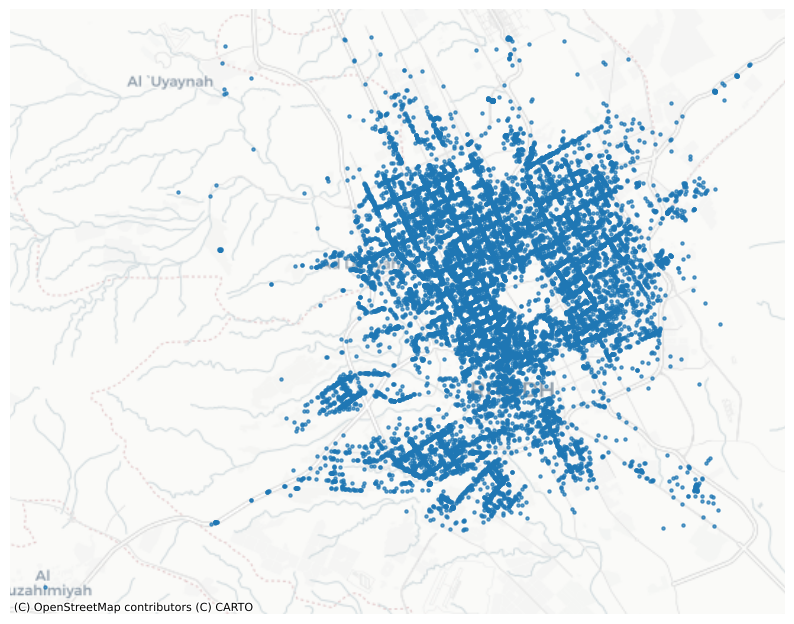

In [ ]:
import contextily as ctx

ax = gdf.to_crs(3857).plot(figsize=(10,10), markersize=5, alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()


#### NLP EDA


Fixing Arabic text...


Processing names: 100%|██████████| 19361/19361 [00:50<00:00, 380.10it/s]



Top 10 most repeated tokens:
'Restaurant': 5828
'Shop': 4927
'Coffee': 2913
'Food': 2359
'Café': 1930
'Place': 1754
'Joint': 1258
'Eastern': 1189
'Fast': 1178
'Middle': 1168

Generating WordCloud...


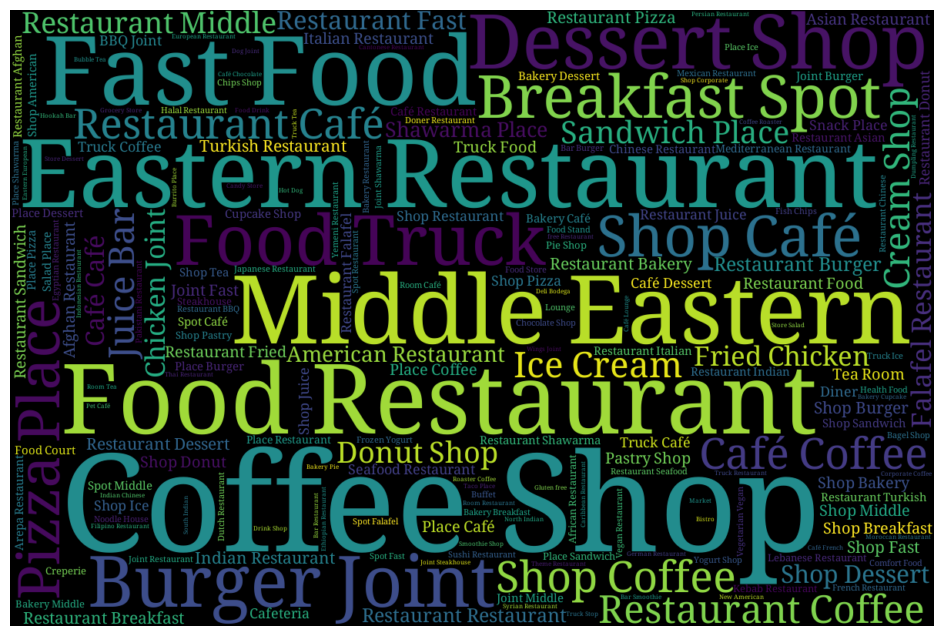

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from collections import Counter
from tqdm import tqdm   # <-- Progress bar

# ---------------------------
# Fix Arabic: connect letters + RTL direction
# ---------------------------
def fix_arabic(text):
    reshaped = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped)
    return bidi_text

# ---------------------------
# Prepare text with progress bar
# ---------------------------
names_list = df['categories'].astype(str).tolist()

print("\nFixing Arabic text...")
names_fixed_list = []
for name in tqdm(names_list, desc="Processing names"):
    names_fixed_list.append(fix_arabic(name))

names_fixed = " ".join(names_fixed_list)

# ---------------------------
# Token Analysis
# ---------------------------
token_counts = Counter(names_fixed.split(" "))
print("\nTop 10 most repeated tokens:")
for token, count in token_counts.most_common(10):
    print(f"'{token}': {count}")

# ---------------------------
# WordCloud
# ---------------------------
font_path = "NotoNaskhArabic-VariableFont_wght.ttf"

print("\nGenerating WordCloud...")
wc = WordCloud(
    width=1200,
    height=800,
    background_color='black',
    font_path=font_path,
    colormap='viridis'
).generate(names_fixed)

# ---------------------------
# Display
# ---------------------------
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [58]:
%pip install osmtogeojson


Note: you may need to restart the kernel to use updated packages.


## 5. Neighborhood Analysis and Mapping


In [ ]:
import folium
import geopandas as gpd
from shapely.geometry import mapping

# --------------------------------------------------
# 1. Load your GeoJSON normally
# --------------------------------------------------
gdf = gpd.read_file("riyadh_neighborhoods.geojson")
gdf = gdf[gdf.geometry.notnull()]
gdf["name"] = gdf["name"].fillna("").astype(str)

# --------------------------------------------------
# 2. Compute map center
# --------------------------------------------------
center = gdf.geometry.union_all().centroid
map_center = [center.y, center.x]

# --------------------------------------------------
# 3. Create map object (NOT DISPLAYED in notebook!)
# --------------------------------------------------
m = folium.Map(
    location=map_center,
    zoom_start=11,
    tiles="CartoDB Positron"
)

# --------------------------------------------------
# 4. Build feature collection
# --------------------------------------------------
features = []
for _, row in gdf.iterrows():
    if row.geometry is None or row.geometry.is_empty:
        continue
    features.append({
        "type": "Feature",
        "properties": {"name": row["name"]},
        "geometry": mapping(row.geometry)
    })

fc = {"type": "FeatureCollection", "features": features}

# --------------------------------------------------
# 5. Add to map (still not displayed)
# --------------------------------------------------
folium.GeoJson(
    fc,
    name="Neighborhoods",
    tooltip=folium.GeoJsonTooltip(
        fields=["name"],
        aliases=["الحي:"],
        localize=True
    )
).add_to(m)

# --------------------------------------------------
# 6. Save directly to HTML
# --------------------------------------------------
output_path = "riyadh_map.html"
m.save(output_path)

print("✔ Map saved to:", output_path)
print("👉 Open this file in your browser to view the map.")


✔ Map saved to: riyadh_map.html
👉 Open this file in your browser to view the map.


In [ ]:
%pip install folium



  Using cached branca-0.8.2-py3-none-any.whl.metadata (1.7 kB)
Using cached branca-0.8.2-py3-none-any.whl (26 kB)

   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



## 5. Neighborhood Analysis and Mapping


In [61]:
gdf.columns


Index(['name', 'admin_level', 'place', 'boundary', 'geometry', 'centroid'], dtype='object')

In [63]:
import geopandas as gpd
import folium

# ---------------------------------------
# Load data
# ---------------------------------------
gdf = gpd.read_file("riyadh_neighborhoods.geojson")
gdf = gdf[gdf.geometry.notnull()].copy()

# Ensure names are valid strings (Arabic will display correctly)
gdf["name"] = gdf["name"].fillna("").astype(str)

# Compute centroids (used only for labels)
gdf["centroid"] = gdf.geometry.centroid

# ---------------------------------------
# Create map
# ---------------------------------------
center = gdf.geometry.union_all().centroid

m = folium.Map(
    location=[center.y, center.x],
    zoom_start=11,
    tiles="CartoDB Positron"
)

# ---------------------------------------
# Add neighborhood boundaries
# (remove centroid column before passing to Folium)
# ---------------------------------------
folium.GeoJson(
    gdf.drop(columns=["centroid"]),
    name="Neighborhoods"
).add_to(m)

# ---------------------------------------
# Add Arabic labels at centroids
# ---------------------------------------
for _, row in gdf.iterrows():
    if row['name'].strip():  # ✅ FIX HERE
        folium.Marker(
            location=[row.centroid.y, row.centroid.x],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size:11px;
                    font-weight:bold;
                    direction: rtl;
                    text-align: center;
                    background-color: rgba(255,255,255,0.7);
                    padding: 2px 4px;
                    border-radius: 4px;
                    white-space: nowrap;
                ">
                    {row['name']}
                </div>
                """
            )
        ).add_to(m)


# ---------------------------------------
# Save map
# ---------------------------------------
m.save("riyadh_neighborhoods_labels.html")


C:\Users\azozx\AppData\Local\Temp\ipykernel_31372\2712203189.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.geometry.centroid


## 6. Spatial Correlation of Categories (Spatial Proximity)


In [72]:
%pip install scikit-learn seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [87]:
district_geo = district_proj.to_crs(epsg=4326)
district_geo.geometry.area.describe()

C:\Users\azozx\AppData\Local\Temp\ipykernel_31372\94031792.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_geo.geometry.area.describe()


count    151.000000
mean       0.000024
std        0.000018
min        0.000002
25%        0.000014
50%        0.000019
75%        0.000028
max        0.000113
dtype: float64

In [85]:
district_geo.head()

,name,admin_level,place,boundary,geometry,poi_count,likes,rating,sum_likes
0,القدس,10,neighbourhood,administrative,"POLYGON ((46.74879 24.73996, 46.74865 24.74, 4...",56.0,3915.0,7.460000,3915.0
1,الروضة,10,neighbourhood,administrative,"POLYGON ((46.74865 24.74, 46.74869 24.74014, 4...",53.0,2645.0,7.325714,2645.0
2,الأندلس,10,neighbourhood,administrative,"POLYGON ((46.80273 24.73986, 46.78698 24.73008...",28.0,544.0,7.284615,544.0
3,النهضة,10,neighbourhood,administrative,"POLYGON ((46.79013 24.7568, 46.79017 24.75693,...",36.0,769.0,7.553333,769.0
4,حي الخليج,10,neighbourhood,administrative,"POLYGON ((46.78509 24.76349, 46.78471 24.76406...",38.0,784.0,7.620000,784.0


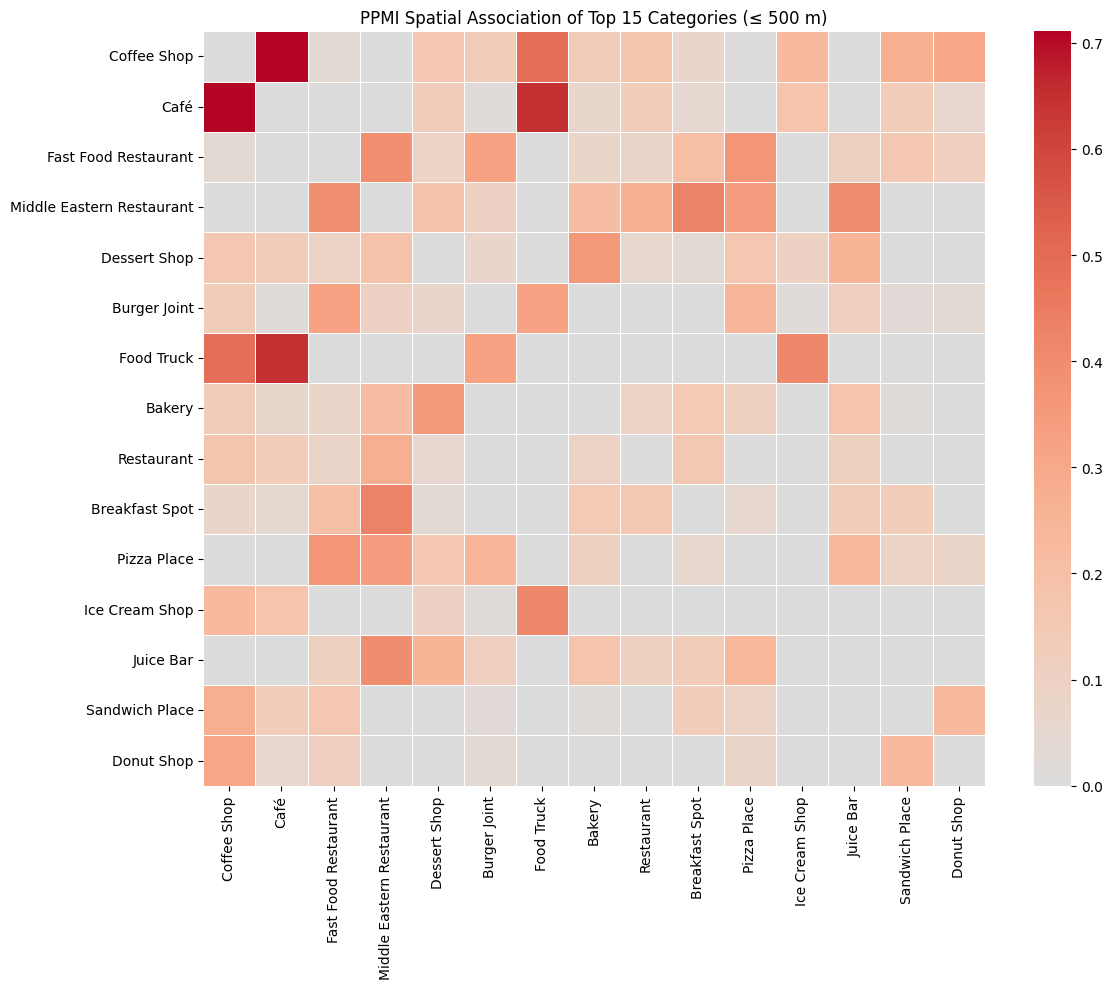

In [77]:
import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------------------
# Spatial constants (NO MAGIC NUMBERS)
# --------------------------------------------------
EARTH_RADIUS_METERS = 6_371_000     # Mean Earth radius (meters)
NEIGHBOR_RADIUS_METERS = 500        # Spatial proximity threshold (meters)

# --------------------------------------------------
# 1. Prepare Data (categories are multi-label)
# --------------------------------------------------
df_exploded = (
    df[['lat', 'lng', 'categories']]
    .dropna(subset=['categories'])
    .assign(categories=lambda x: x['categories'].str.split(', '))
    .explode('categories')
)

# Function to get top N atomic categories
def get_top_categories(df_exp, n=20):
    return df_exp['categories'].value_counts().head(n).index.tolist()

top_cats = get_top_categories(df_exploded, 15)
df_top = df_exploded[df_exploded['categories'].isin(top_cats)].copy()

# Convert lat/lng to radians for BallTree
df_top['lat_rad'] = np.radians(df_top['lat'])
df_top['lng_rad'] = np.radians(df_top['lng'])

# --------------------------------------------------
# 2. Build BallTree
# --------------------------------------------------
tree = BallTree(
    df_top[['lat_rad', 'lng_rad']].values,
    metric='haversine'
)

# --------------------------------------------------
# 3. Find Neighbors (radius in radians)
# --------------------------------------------------
radius_rad = NEIGHBOR_RADIUS_METERS / EARTH_RADIUS_METERS

indices = tree.query_radius(
    df_top[['lat_rad', 'lng_rad']].values,
    r=radius_rad
)

# --------------------------------------------------
# 4. Construct RAW Co-occurrence Matrix
# --------------------------------------------------
co_matrix = pd.DataFrame(0, index=top_cats, columns=top_cats)

for i, neighbor_indices in enumerate(indices):
    cat_i = df_top.iloc[i]['categories']
    neighbor_cats = df_top.iloc[neighbor_indices]['categories'].values

    for cat_j in neighbor_cats:
        if cat_i != cat_j:
            co_matrix.loc[cat_i, cat_j] += 1

# --------------------------------------------------
# 5. BASE-RATE CORRECTED NORMALIZATION (PPMI)
# --------------------------------------------------
total = co_matrix.values.sum()

# Probabilities
Pij = co_matrix / total
Pi = Pij.sum(axis=1).values.reshape(-1, 1)
Pj = Pij.sum(axis=0).values.reshape(1, -1)

# Pointwise Mutual Information
PMI = np.log2((Pij / (Pi @ Pj)) + 1e-9)

# Positive PMI (remove negative noise)
PPMI = np.maximum(PMI, 0)

ppmi_df = pd.DataFrame(PPMI, index=top_cats, columns=top_cats)

# --------------------------------------------------
# 6. Visualization (True spatial association)
# --------------------------------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(
    ppmi_df,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title(
    f'PPMI Spatial Association of Top {len(top_cats)} Categories (≤ {NEIGHBOR_RADIUS_METERS} m)'
)
plt.tight_layout()
plt.show()


## 7. District-Level Analysis (POI Counts, Likes, Ratings)


In [88]:
import folium
import geopandas as gpd

# --------------------------------------------------
# Prepare data and ensure correct CRS
# --------------------------------------------------
district_geo = district_map_data.drop(columns=['centroid'], errors='ignore').copy()

# Ensure the CRS is WGS84 (EPSG:4326)
if district_geo.crs is None:
    district_geo.set_crs(epsg=4326, inplace=True)
elif district_geo.crs != "EPSG:4326":
    district_geo = district_geo.to_crs(epsg=4326)

# Verify geometries are valid
district_geo['geometry'] = district_geo['geometry'].make_valid()

# --------------------------------------------------
# Create map
# --------------------------------------------------
m_dist = folium.Map(
    location=[24.7136, 46.6753],
    zoom_start=11,
    tiles='CartoDB Positron'
)

# --------------------------------------------------
# Create choropleth
# --------------------------------------------------
choropleth = folium.Choropleth(
    geo_data=district_geo.__geo_interface__,  # Convert to GeoJSON format
    name='Avg Rating',
    data=district_geo,
    columns=['name', 'rating'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='متوسط تقييم المطاعم',
    highlight=True
).add_to(m_dist)

# --------------------------------------------------
# Add tooltips
# --------------------------------------------------
folium.GeoJsonTooltip(
    fields=["name", "rating"],
    aliases=["الحي:", "التقييم:"],
    direction="rtl",
    sticky=False
).add_to(choropleth.geojson)

# --------------------------------------------------
# Save map
# --------------------------------------------------
m_dist.save("riyadh_district_choropleth_arabic.html")

print(f"CRS: {district_geo.crs}")
print(f"Number of districts: {len(district_geo)}")
print(f"Rating range: {district_geo['rating'].min():.2f} - {district_geo['rating'].max():.2f}")

CRS: EPSG:4326
Number of districts: 151
Rating range: 0.00 - 8.67
